# **레스토랑 주문데이터 분석하기**

[ 코드 출처: 이것이 데이터 분석이다 with 파이썬 - 윤기태 저, 한빛미디어 ]

## **1. Chipotle 데이터셋 읽어오기**

In [1]:
import gdown

In [2]:
google_path = 'https://drive.google.com/uc?id='
file_id = '1U5Ryj_v1a5jqoXDhtaiH3bAOC4BwQ3CD'
output_name = 'chipotle.tsv'
gdown.download(google_path+file_id,output_name,quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1U5Ryj_v1a5jqoXDhtaiH3bAOC4BwQ3CD
To: /content/chipotle.tsv
100%|██████████| 365k/365k [00:00<00:00, 24.6MB/s]


'chipotle.tsv'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
chipo = pd.read_csv('./chipotle.tsv', sep = '\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


## **2. 데이터 분석**

### 2.1 탐색: 데이터의 기초 정보 살펴보기

- Chipotle 데이터셋의 기본 정보 확인

In [6]:
print(chipo.shape)
print("------------------------------------------------------------------------------")
print(chipo.info())
print("------------------------------------------------------------------------------")
print(chipo.columns)
print("------------------------------------------------------------------------------")
print(chipo.index)

(4622, 5)
------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None
------------------------------------------------------------------------------
Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
------------------------------------------------------------------------------
RangeIndex(start=0, stop=4622, step=1)


- Chipotle 데이터셋의 수치적 특징 파악

In [7]:
chipo['order_id'] = chipo['order_id'].astype(str)     # order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환
print(chipo.head(10))
print("------------------------------------------------------------------------------")
print(chipo.describe())                       # chipo dataframe에서 수치형 피처들의 요약 통계량 확인
print("------------------------------------------------------------------------------")
print(len(chipo['order_id'].unique()))        # order_id의 개수
print("------------------------------------------------------------------------------")
print(len(chipo['item_name'].unique()))       # item_name의 개수

  order_id  quantity                              item_name  \
0        1         1           Chips and Fresh Tomato Salsa   
1        1         1                                   Izze   
2        1         1                       Nantucket Nectar   
3        1         1  Chips and Tomatillo-Green Chili Salsa   
4        2         2                           Chicken Bowl   
5        3         1                           Chicken Bowl   
6        3         1                          Side of Chips   
7        4         1                          Steak Burrito   
8        4         1                       Steak Soft Tacos   
9        5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                         

### 2.2 인사이트 발견: 탐색과 시각화

- 가장 많이 주문한 아이템

In [8]:
item_count = chipo['item_name'].value_counts()[:10]
print(item_count)
print("------------------------------------------------------------------------------")
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64
------------------------------------------------------------------------------
Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


<ipython-input-8-38299bb91cce>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):


In [9]:
chipo['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

- 아이템당 주문 개수와 총량 구하기

In [10]:
# item당 주문 개수
order_count = chipo.groupby('item_name')['order_id'].count()
print(order_count)
print("------------------------------------------------------------------------------")
order_count[:10]

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [11]:
# item당 주문 총량
item_quantity = chipo.groupby('item_name')['quantity'].sum()
print(item_quantity)
print("------------------------------------------------------------------------------")
item_quantity[:10]

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

- 시각화를 통해 분석 결과 살펴보기

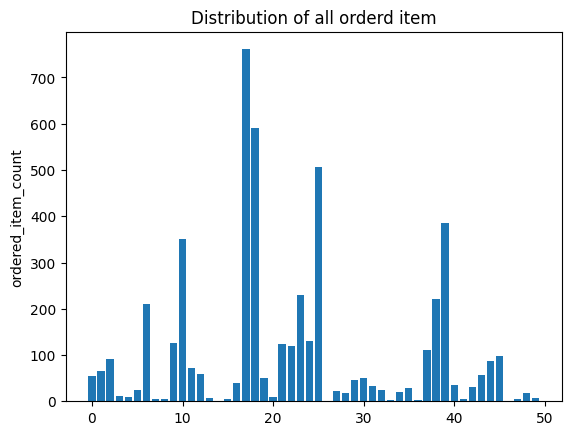

In [12]:
item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')

plt.show()

### 2.3 데이터 전처리: 나만의 조력자를 정의하자

- apply와 lambda 함수를 이용한 데이터 전처리

In [13]:
print(chipo.info())
print("------------------------------------------------------------------------------")
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
------------------------------------------------------------------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [14]:
# column 단위 데이터에 apply 함수로 전처리 적용
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [15]:
print(chipo['item_price'])
print("------------------------------------------------------------------------------")
chipo['item_price'].head()

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64
------------------------------------------------------------------------------


0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [16]:
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


### 2.4 탐색적 분석: 스무고개로 분석하는 개념적 탐색



- 데이터를 이해하기 위한 조금 더 복잡한 질문들로 탐색적 데이터 분석 연습하기
  - 주문당 평균 계산금액 출력하기
  - 한 주문에 10달러 이상 사용한 주문의 id들 출력하기
  - 각 아이템의 가격 구하기
  - 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기
  - 'Veggie Salad Bowl'이 몇 번 주문되었는지 구하기
  - 'Chicken Bowl'을 2개 이상 주문한 주문 횟수 구하기

- 주문당 평균 계산금액 출력하기

In [17]:
# 주문당 평균 계산금액 출력
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [18]:
chipo.groupby('order_id')['item_price'].sum().describe()[:10]

count    1834.000000
mean       18.811429
std        11.652512
min        10.080000
25%        12.572500
50%        16.200000
75%        21.960000
max       205.250000
Name: item_price, dtype: float64

- 한 주문에 10달러 이상 사용한 주문 번호(id) 출력하기

In [19]:
# 한 주문에 10달러 이상 사용한 id 출력
chipo_orderid_group = chipo.groupby('order_id').sum()
chipo_orderid_group

<ipython-input-19-d783bba5084f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo_orderid_group = chipo.groupby('order_id').sum()


,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [20]:
results = chipo_orderid_group[chipo_orderid_group.item_price >= 20]
results

,quantity,item_price
order_id,,
1000,2,20.50
1004,2,21.96
1006,8,71.40
1010,5,33.24
1012,2,22.50
...,...,...
987,2,23.00
995,3,24.95
996,4,43.00


In [21]:
print(results[:10])
print("------------------------------------------------------------------------------")
print(results.index.values)

          quantity  item_price
order_id                      
1000             2       20.50
1004             2       21.96
1006             8       71.40
1010             5       33.24
1012             2       22.50
1013             4       31.90
1016             3       32.25
1017             2       22.50
1026             4       31.70
103              6       47.90
------------------------------------------------------------------------------
['1000' '1004' '1006' '1010' '1012' '1013' '1016' '1017' '1026' '103'
 '1030' '1031' '1033' '1035' '1038' '1041' '1044' '1051' '1052' '1057'
 '1059' '1063' '1070' '1071' '1074' '1076' '1078' '1079' '108' '1080'
 '1082' '1085' '1087' '1088' '1091' '1092' '1095' '1097' '110' '1102'
 '1103' '1106' '1110' '1113' '1115' '1116' '1126' '1128' '1136' '1138'
 '1140' '1142' '1153' '1154' '1156' '1157' '1158' '1166' '1167' '1168'
 '1169' '1170' '1171' '1175' '1176' '1182' '1188' '1189' '1191' '1193'
 '1196' '1206' '1208' '1209' '1221' '1222' '1223' '1224

- 각 아이템의 가격 구하기

In [22]:
# 각 아이템의 가격 계산
chipo_one_item = chipo[chipo.quantity == 1]
print(chipo_one_item)

     order_id  quantity                              item_name  \
0           1         1           Chips and Fresh Tomato Salsa   
1           1         1                                   Izze   
2           1         1                       Nantucket Nectar   
3           1         1  Chips and Tomatillo-Green Chili Salsa   
5           3         1                           Chicken Bowl   
...       ...       ...                                    ...   
4617     1833         1                          Steak Burrito   
4618     1833         1                          Steak Burrito   
4619     1834         1                     Chicken Salad Bowl   
4620     1834         1                     Chicken Salad Bowl   
4621     1834         1                     Chicken Salad Bowl   

                                     choice_description  item_price  
0                                                   NaN        2.39  
1                                          [Clementine]        3.39

In [23]:
price_per_item = chipo_one_item.groupby('item_name').min()
print(price_per_item)

                                      order_id  quantity  \
item_name                                                  
6 Pack Soft Drink                         1076         1   
Barbacoa Bowl                             1000         1   
Barbacoa Burrito                          1002         1   
Barbacoa Crispy Tacos                      110         1   
Barbacoa Salad Bowl                       1283         1   
Barbacoa Soft Tacos                       1103         1   
Bottled Water                             1009         1   
Bowl                                       279         1   
Burrito                                    214         1   
Canned Soda                                100         1   
Canned Soft Drink                         1003         1   
Carnitas Bowl                             1007         1   
Carnitas Burrito                          1003         1   
Carnitas Crispy Tacos                     1774         1   
Carnitas Salad                          

In [24]:
chipo["new_item_price"] = chipo["item_price"]/chipo["quantity"]

In [25]:
chipo

,order_id,quantity,item_name,choice_description,item_price,new_item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [26]:
price_per_item = chipo.groupby('item_name').min()
price_per_item.sort_values(by=["item_price"], ascending=False)[:20]

,order_id,quantity,choice_description,item_price,new_item_price
item_name,,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39,9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39,9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39,9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99,8.99
Carnitas Crispy Tacos,1559,1,"[Fresh Tomato Salsa (Mild), [Cheese, Lettuce]]",8.99,8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99,8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99,8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99,8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99,8.99


In [27]:
price_per_item.sort_values(by=["item_price"], ascending=False)[:10]
price_per_item

,order_id,quantity,choice_description,item_price,new_item_price
item_name,,,,,
6 Pack Soft Drink,1076,1,[Coke],6.49,6.49
Barbacoa Bowl,1000,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69,8.69
Barbacoa Burrito,1002,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69,8.69
Barbacoa Crispy Tacos,110,1,"[Fresh Tomato Salsa, Guacamole]",8.99,8.99
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39,9.39
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99,8.99
Bottled Water,1009,1,NaN,1.09,1.09
Bowl,193,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.40,7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40,7.40


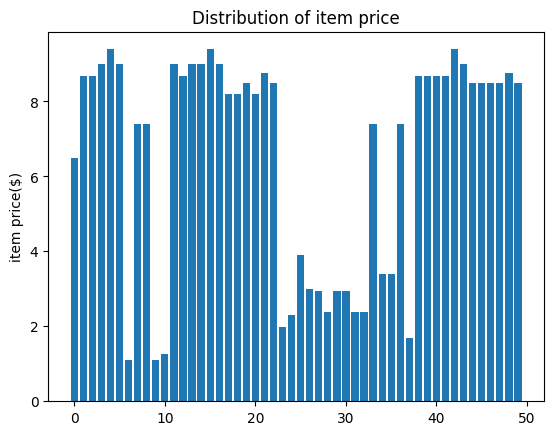

In [28]:
# 아이템 가격 분포 그래프 출력
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')

plt.show()

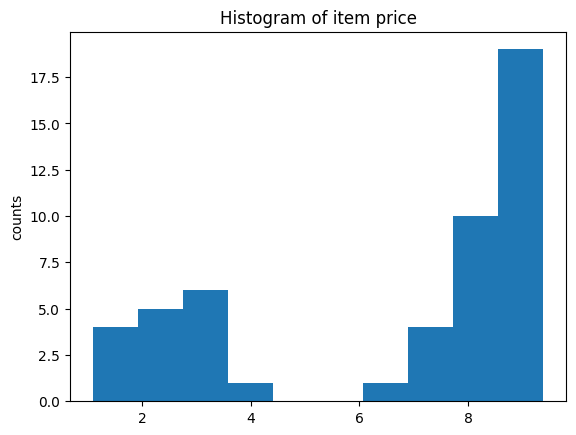

In [29]:
# 아이템 가격 히스토그램 출력
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()

- 가장 비싼 주문에서 item이 총 몇개 팔렸는지 구하기

In [30]:
# 가장 비싼 주문에서 item이 총 몇개 팔렸는지 계산
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

<ipython-input-30-4e9f7d9a3aa1>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]


,quantity,item_price,new_item_price
order_id,,,
926,23,205.25,205.25
1443,35,160.74,41.69
1483,14,139.00,139.00
691,11,118.25,118.25
1786,20,114.30,93.45


- 'Veggie Salad Bowl'이 몇 번 주문되었는지 구하기

In [31]:
# “Veggie Salad Bowl”이 몇 번 주문되었는지 계산
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
print(chipo_salad)
print("------------------------------------------------------------------------------")
print(len(chipo_salad))
print("------------------------------------------------------------------------------")
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id']) # 한 주문 내에서 중복 집계된 item_name을 제거
print(chipo_salad)
print("------------------------------------------------------------------------------")
print(len(chipo_salad))
print("------------------------------------------------------------------------------")
chipo_salad.head(5)

     order_id  quantity          item_name  \
186        83         1  Veggie Salad Bowl   
295       128         1  Veggie Salad Bowl   
455       195         1  Veggie Salad Bowl   
496       207         1  Veggie Salad Bowl   
960       394         1  Veggie Salad Bowl   
1316      536         1  Veggie Salad Bowl   
1884      760         1  Veggie Salad Bowl   
2156      869         1  Veggie Salad Bowl   
2223      896         1  Veggie Salad Bowl   
2269      913         1  Veggie Salad Bowl   
2683     1066         1  Veggie Salad Bowl   
3223     1289         1  Veggie Salad Bowl   
3293     1321         1  Veggie Salad Bowl   
4109     1646         1  Veggie Salad Bowl   
4201     1677         1  Veggie Salad Bowl   
4261     1700         1  Veggie Salad Bowl   
4541     1805         1  Veggie Salad Bowl   
4573     1818         1  Veggie Salad Bowl   

                                     choice_description  item_price  \
186   [Fresh Tomato Salsa, [Fajita Vegetables, Rice,..

,order_id,quantity,item_name,choice_description,item_price,new_item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25,11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25,11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


- "Chicken Bowl"을 2개 이상 주문한 주문 횟수 구하기

In [32]:
# “Chicken Bowl”을 2개 이상 주문한 주문 횟수 계산
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
print(chipo_chicken)
print("------------------------------------------------------------------------------")
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]
print(chipo_chicken_result)
print("------------------------------------------------------------------------------")
print(chipo_chicken_result.shape[0])

     order_id  quantity     item_name  \
4           2         2  Chicken Bowl   
5           3         1  Chicken Bowl   
13          7         1  Chicken Bowl   
19         10         1  Chicken Bowl   
26         13         1  Chicken Bowl   
...       ...       ...           ...   
4590     1825         1  Chicken Bowl   
4591     1825         1  Chicken Bowl   
4595     1826         1  Chicken Bowl   
4599     1827         1  Chicken Bowl   
4604     1828         1  Chicken Bowl   

                                     choice_description  item_price  \
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98   
5     [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...       10.98   
13    [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       11.25   
19    [Tomatillo Red Chili Salsa, [Fajita Vegetables...        8.75   
26    [Roasted Chili Corn Salsa (Medium), [Pinto Bea...        8.49   
...                                                 ...         ...   
4590  [Roa

In [33]:
# “Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량 계산
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
print(chipo_chicken)
print("------------------------------------------------------------------------------")
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
print(chipo_chicken_ordersum)
print("------------------------------------------------------------------------------")
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]
print(chipo_chicken_result)
print("------------------------------------------------------------------------------")

print(len(chipo_chicken_result))
print("------------------------------------------------------------------------------")
chipo_chicken_result.head(5)

     order_id  quantity     item_name  \
4           2         2  Chicken Bowl   
5           3         1  Chicken Bowl   
13          7         1  Chicken Bowl   
19         10         1  Chicken Bowl   
26         13         1  Chicken Bowl   
...       ...       ...           ...   
4590     1825         1  Chicken Bowl   
4591     1825         1  Chicken Bowl   
4595     1826         1  Chicken Bowl   
4599     1827         1  Chicken Bowl   
4604     1828         1  Chicken Bowl   

                                     choice_description  item_price  \
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98   
5     [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...       10.98   
13    [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       11.25   
19    [Tomatillo Red Chili Salsa, [Fajita Vegetables...        8.75   
26    [Roasted Chili Corn Salsa (Medium), [Pinto Bea...        8.49   
...                                                 ...         ...   
4590  [Roa

<ipython-input-33-fdd13a98486e>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64